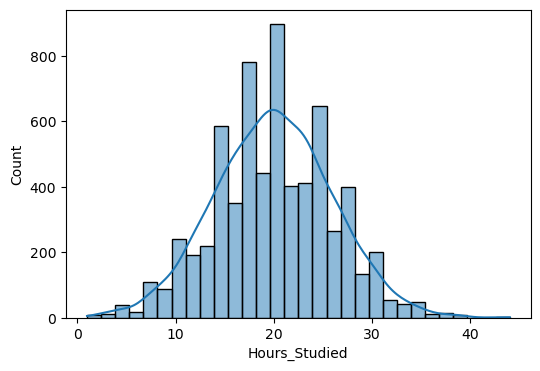

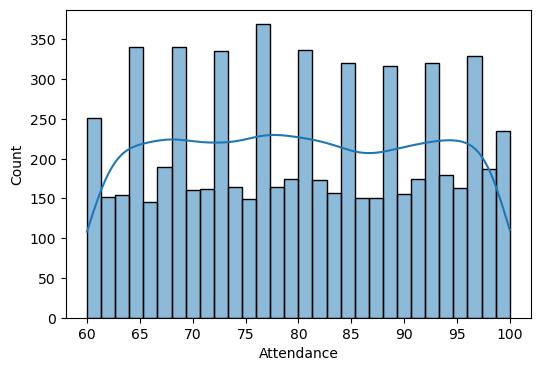

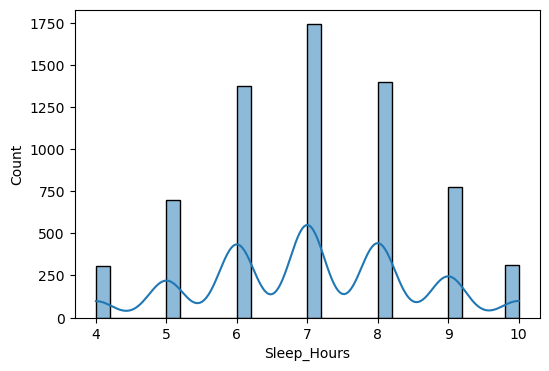

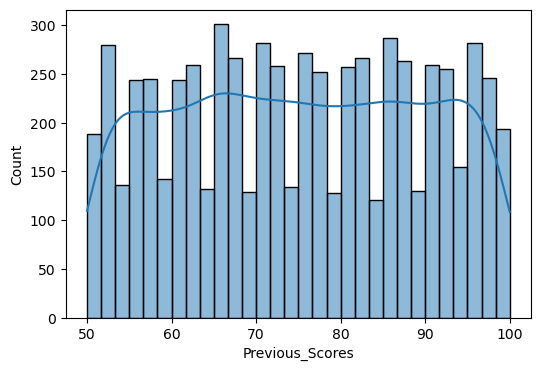

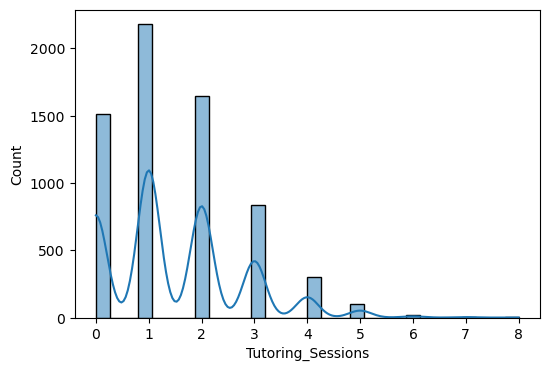

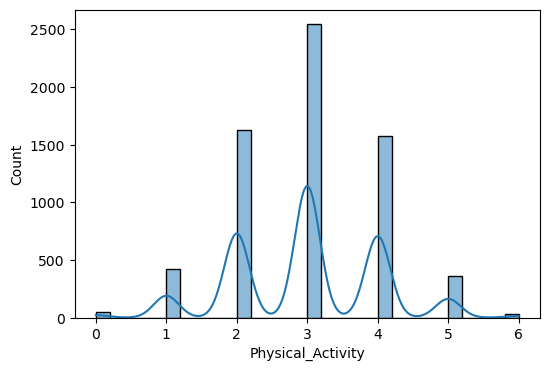

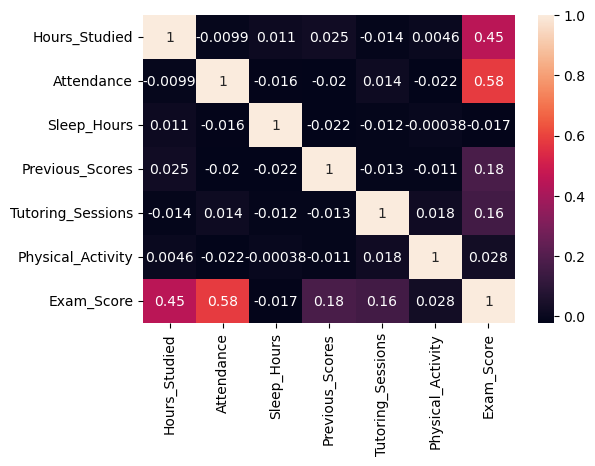

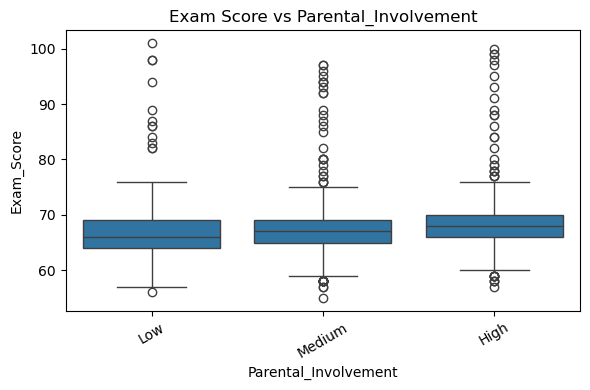

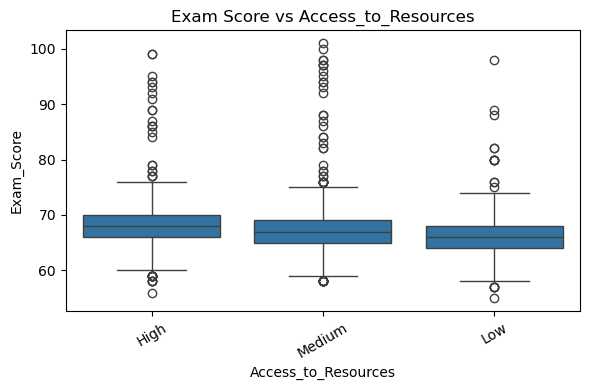

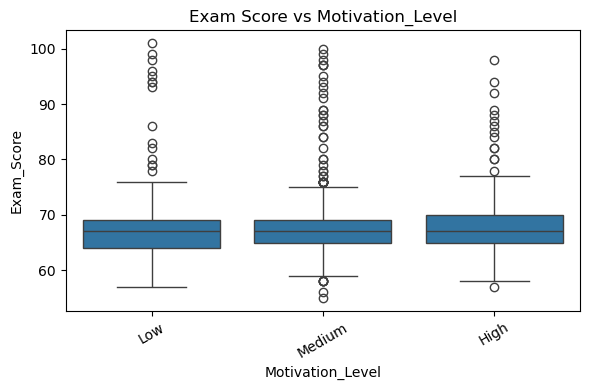

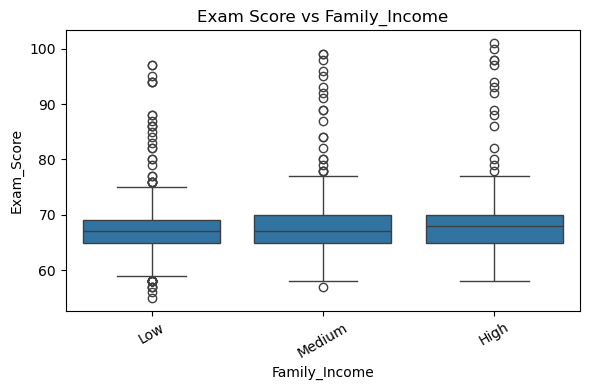

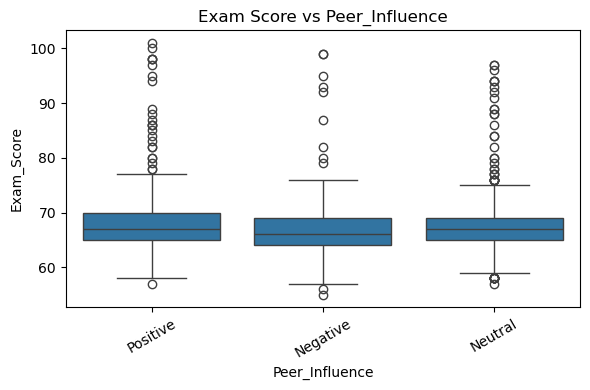

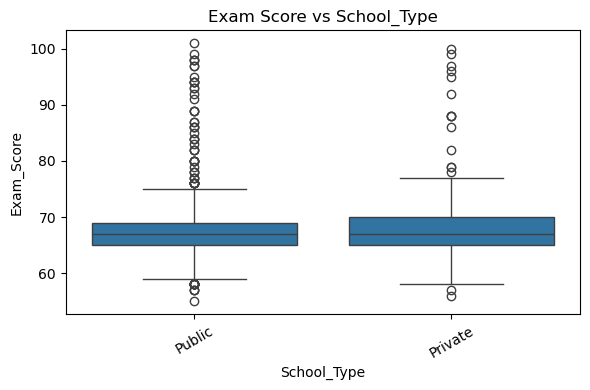

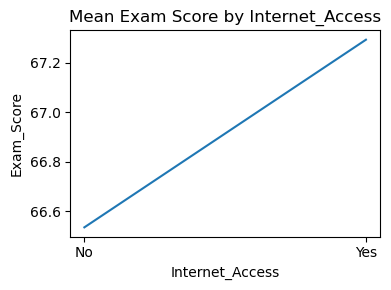

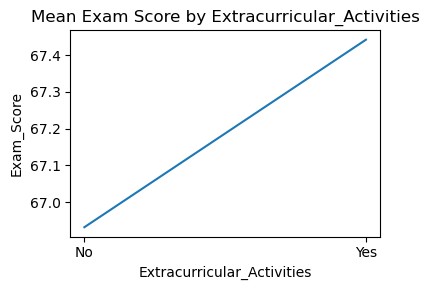

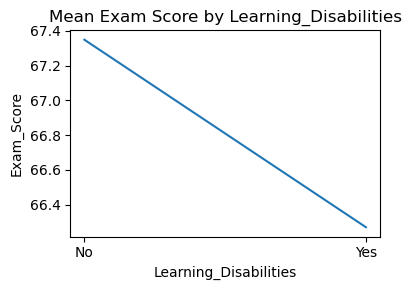

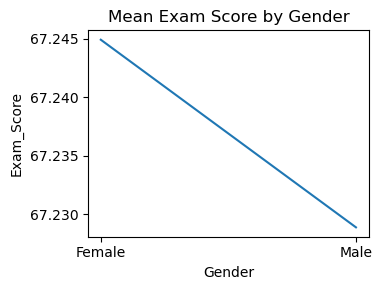

Linear Regression
RMSE: 1.8985055333842378
R2: 0.745008505109463

Random Forest
RMSE: 2.178738331835232
R2: 0.6641757070820333

XGBoost
RMSE: 2.131800484810282
R2: 0.6784895658493042
Ridge Regression
RMSE: 1.8984926299763698
R2: 0.7450119712548309


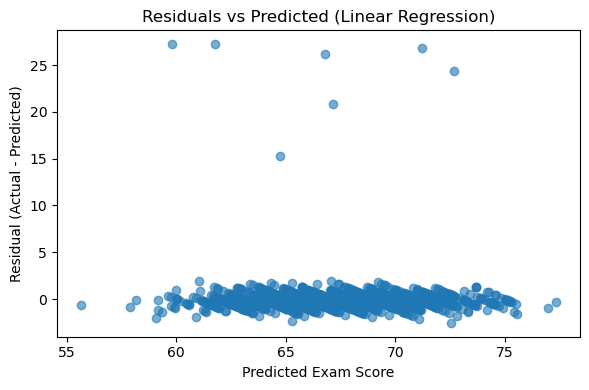

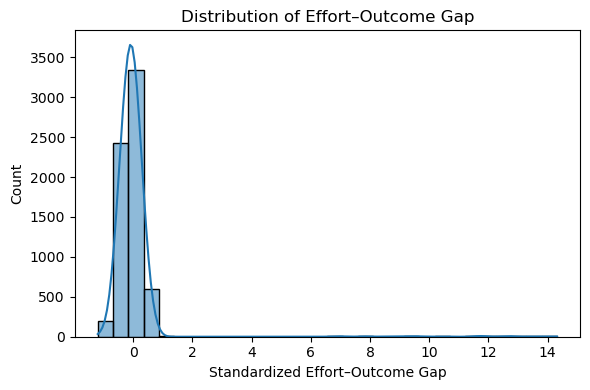

  File "C:\Users\Darshil Mehta\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Darshil Mehta\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darshil Mehta\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darshil

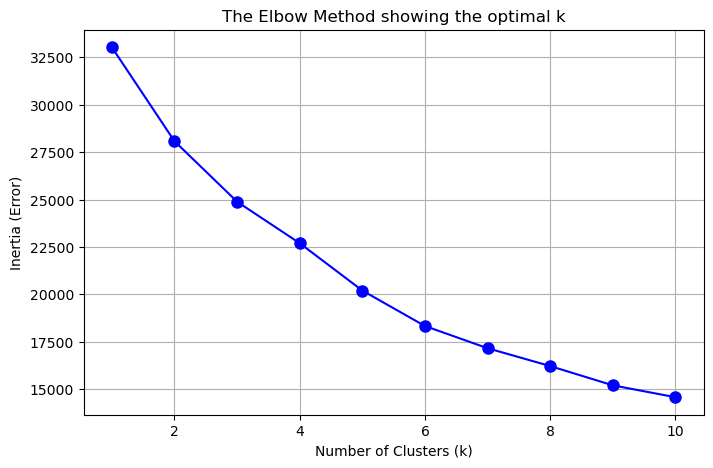

k=2, silhouette=0.160
k=3, silhouette=0.163
k=4, silhouette=0.157
k=5, silhouette=0.161
k=6, silhouette=0.161
k=7, silhouette=0.162
k=8, silhouette=0.163


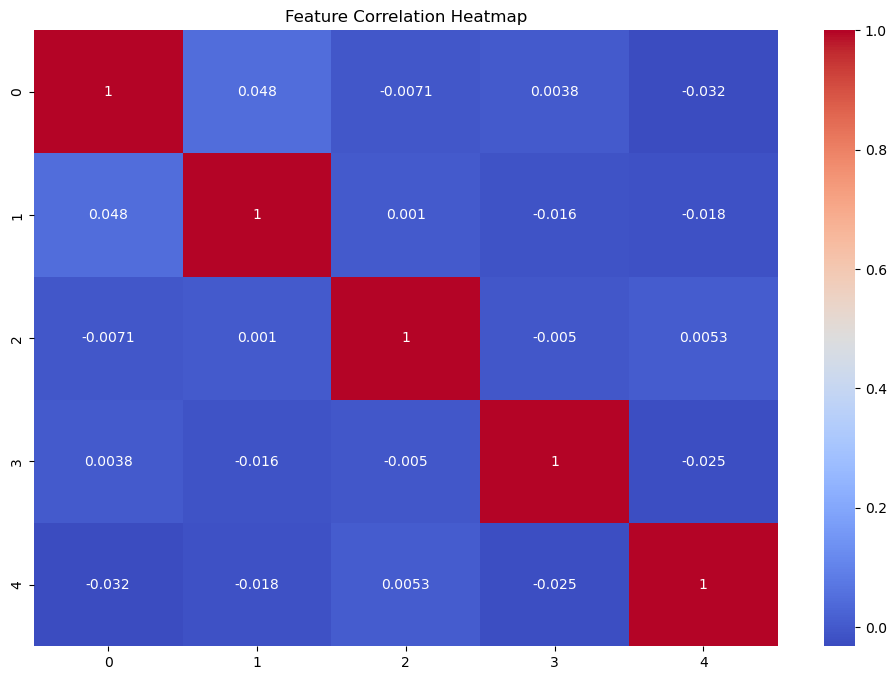

         gap_for_clustering  Sleep_Hours  Motivation_Level  Attendance  \
Cluster                                                                  
0                 -0.048902     7.084890          1.294143   70.135823   
1                 -0.052582     7.026329          0.000000   79.934435   
2                 -0.070451     6.974503          1.270527   90.033708   

         resource_index  
Cluster                  
0              0.614177  
1              0.599961  
2              0.593885  
         gap_for_clustering  Sleep_Hours  Motivation_Level  Attendance  \
Cluster                                                                  
0                 -0.122069     7.072526          0.604707   69.140730   
1                  0.224539     7.881443          0.751841   83.214286   
2                 -0.152498     6.413382          0.638485   89.771784   
3                 -0.110450     6.979822          2.000000   79.398709   

         resource_index  
Cluster                  
0 

expected_score_improvement
 0.000000    4260
-0.012343     742
 2.004773     341
 0.513326     272
 0.513326     240
-0.012343     119
 0.257365     117
 1.036425     117
 2.004773     103
 2.004773      95
 0.257365      65
-0.012343      56
 1.036425      51
 0.513326      14
 1.036425      10
 0.257365       5
Name: count, dtype: int64

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

df= pd.read_csv('Student_data.csv')

df.head()

df.describe()

df.isnull().sum()

num_cols=["Hours_Studied","Attendance"	,"Sleep_Hours",	"Previous_Scores","Tutoring_Sessions","Physical_Activity","Exam_Score"]
for cols in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols],kde = True,bins = 30)

sns.heatmap(df.corr(numeric_only=True),annot=True)

for col in [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Family_Income",
    "Peer_Influence",
    "School_Type"
]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y="Exam_Score")
    plt.title(f"Exam Score vs {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


binary_cols = [
    "Internet_Access",
    "Extracurricular_Activities",
    "Learning_Disabilities",
    "Gender"
]

for col in binary_cols:
    mean_scores = df.groupby(col)["Exam_Score"].mean().reset_index()

    plt.figure(figsize=(4,3))
    sns.lineplot(data=mean_scores, x=col, y="Exam_Score")
    plt.title(f"Mean Exam Score by {col}")
    plt.tight_layout()
    plt.show()


drop_cols = [
    "Teacher_Quality",
    "Parental_Education_Level",
    "Distance_from_Home"
]

df= df.drop(columns=drop_cols)
'''Hours_Studied
Attendance
Previous_Scores
Sleep_Hours
Motivation_Level
Tutoring_Sessions
'''


ordinal_maps = {
    "Parental_Involvement": {"Low": 0, "Medium": 1, "High": 2},
    "Access_to_Resources": {"Low": 0, "Medium": 1, "High": 2},
    "Motivation_Level": {"Low": 0, "Medium": 1, "High": 2},
    "Family_Income": {"Low": 0, "Medium": 1, "High": 2},
    "Peer_Influence": {"Negative": 0, "Neutral": 1, "Positive": 2}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)


df.columns

df = pd.get_dummies(
    df,
    columns=["School_Type"],
    drop_first=True
)


binary_maps = {
    "Internet_Access": {"No": 0, "Yes": 1},
    "Extracurricular_Activities": {"No": 0, "Yes": 1},
    "Learning_Disabilities": {"No": 0, "Yes": 1},
    "Gender": {"Female": 0, "Male": 1}# arbitrary but documented
}

for col, mapping in binary_maps.items():
    df[col] = df[col].map(mapping)


df.columns

df.head()

X = df.drop(columns=["Exam_Score"])
y = df["Exam_Score"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest")
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost")
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)


from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # small regularization
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)


import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr  # use Linear Regression predictions

plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.6)

plt.xlabel("Predicted Exam Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()


# Scale full feature set (using TRAIN-FITTED scaler)
X_scaled_full = scaler.transform(X)

# Predict expected exam score
df["predicted_exam_score"] = lr.predict(X_scaled_full)


df["effort_outcome_gap"] = df["Exam_Score"] - df["predicted_exam_score"]


gap_mean = df["effort_outcome_gap"].mean()
gap_std = df["effort_outcome_gap"].std()

df["effort_outcome_gap_z"] = (
    (df["effort_outcome_gap"] - gap_mean) / gap_std
)
df["effort_outcome_gap_z"].head()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df["effort_outcome_gap_z"], bins=30,kde= True)

plt.xlabel("Standardized Effort–Outcome Gap")
plt.ylabel("Count")
plt.title("Distribution of Effort–Outcome Gap")
plt.tight_layout()
plt.show()


df.sort_values("effort_outcome_gap_z").head(10)[
    ["Exam_Score", "predicted_exam_score", "effort_outcome_gap_z"]
]


from sklearn.preprocessing import MinMaxScaler

resource_cols = [
    "Access_to_Resources",
    "Internet_Access",
    "Parental_Involvement",
    "Family_Income"
]

scaler_resources = MinMaxScaler()

df[[col + "_norm" for col in resource_cols]] = scaler_resources.fit_transform(
    df[resource_cols]
)


norm_cols = [col + "_norm" for col in resource_cols]

df["resource_index"] = df[norm_cols].mean(axis=1)


def resource_mismatch(row):
    r = row["resource_index"]
    g = row["effort_outcome_gap_z"]

    # High-risk mismatches
    if r >= 0.66 and g <= -1.0:
        return "HIGH"   # resources present, still underperforming

    if r <= 0.33 and g <= -1.0:
        return "HIGH"   # lacks resources, underperforming

    # Medium-risk ambiguous cases
    if g <= -0.5:
        return "MEDIUM"

    return "LOW"
df["resource_mismatch_flag"] = df.apply(resource_mismatch, axis=1)


df["resource_mismatch_flag"].value_counts()


df["gap_for_clustering"] = df["effort_outcome_gap_z"].clip(-3, 3)


cluster_features = [
    "gap_for_clustering",
    "Sleep_Hours",
    "Motivation_Level",
    "Attendance",
    'resource_index'
]

X_cluster = df[cluster_features]

from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
k_range = range(1, 11) # Usually check a wider range, e.g., 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    # .inertia_ is the sum of squared distances of samples to their closest cluster center
    inertia_values.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Error)')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    silhouette_scores[k] = score
    print(f"k={k}, silhouette={score:.3f}")


X_df_scaled = pd.DataFrame(X_cluster_scaled)

plt.figure(figsize=(12, 8))
sns.heatmap(X_df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

df.columns

# Create the model for k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# See the 'Personality' of each cluster
profile = df.groupby('Cluster')[cluster_features].mean()
print(profile)

# Create the model for k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# See the 'Personality' of each cluster
profile = df.groupby('Cluster')[cluster_features].mean()
print(profile)

df['gap_for_clustering'].describe()

df['resource_index'].describe()

persona_map = {
    0: "Disengaged Despite Resources",
    1: "Resilient Low-Resource Learners",
    2: "Overworked Strugglers",
    3: "Motivated but Inconsistent"
}

df["failure_mode_persona"] = df["Cluster"].map(persona_map)


df["failure_mode_persona"].head(20)

df["failure_mode_persona"].value_counts()


# feature 5 

def assign_primary_lever(row):

    # Step 0: If student is not underperforming, don't intervene
    if row["effort_outcome_gap_z"] >= -0.2:
        return "NO_INTERVENTION"

    # Step 1: Biological constraint
    if row["Sleep_Hours"] <= 6:
        return "SLEEP"

    # Step 2: Structural engagement
    if row["Attendance"] < 75:
        return "ATTENDANCE"

    # Step 3: Resource constraint
    if row["Access_to_Resources"] <= 0.8:
        return "RESOURCES"

    # Step 4: Psychological factor
    if row["Motivation_Level"] <= 0.8:
        return "MOTIVATION"

    # Step 5: Optimization lever
    return "TUTORING"

df["primary_lever"] = df.apply(assign_primary_lever, axis=1)


df["primary_lever"] .head(10)

from sklearn.tree import DecisionTreeClassifier

lever_features = [
    "Sleep_Hours",
    "Attendance",
    "Motivation_Level",
    "Access_to_Resources",
    "Tutoring_Sessions",
    "effort_outcome_gap_z"
]

X_lever = df[lever_features]
y_lever = df["primary_lever"]

tree = DecisionTreeClassifier(
    max_depth= 6 ,
    random_state=42
)

tree.fit(X_lever, y_lever)


from sklearn.tree import export_text

rules = export_text(tree, feature_names=lever_features)
print(rules)


lever_actions = {
    "SLEEP": lambda row: row.assign(Sleep_Hours=row["Sleep_Hours"] + 1),
    "ATTENDANCE": lambda row: row.assign(Attendance=min(row["Attendance"] + 10, 100)),
    "MOTIVATION": lambda row: row.assign(Motivation_Level=min(row["Motivation_Level"] + 1, 2)),
    "RESOURCES": lambda row: row.assign(Access_to_Resources=min(row["Access_to_Resources"] + 1, 2)),
    "TUTORING": lambda row: row.assign(Tutoring_Sessions=row["Tutoring_Sessions"] + 1),
}


df.columns

def simulate_intervention(row):
    lever = row["primary_lever"]
    
    # 1. If no intervention needed, improvement is 0
    if lever == "NO_INTERVENTION":
        return 0.0

    # 2. Extract the features used for prediction
    # Ensure X.columns matches the list of features your Linear Regression uses
    current_features = row[X.columns].copy()
    future_features = current_features.copy()

    # 3. Apply the "Intervention Dose"
    if lever == "SLEEP":
        future_features["Sleep_Hours"] += 1
    elif lever == "ATTENDANCE":
        future_features["Attendance"] = min(future_features["Attendance"] + 10, 100)
    elif lever == "MOTIVATION":
        future_features["Motivation_Level"] = min(future_features["Motivation_Level"] + 0.5, 1.0) # adjust your scale
    elif lever == "RESOURCES":
        future_features["Access_to_Resources"] = min(future_features["Access_to_Resources"] + 1, 2)
    elif lever == "TUTORING":
        future_features["Tutoring_Sessions"] += 1

    # 4. Scale both versions for the AI
    # We reshape to (1, -1) because we are predicting for 1 student
    current_scaled = scaler.transform(current_features.values.reshape(1, -1))
    future_scaled = scaler.transform(future_features.values.reshape(1, -1))

    # 5. Get the scores and return the difference
    current_pred = lr.predict(current_scaled)[0]
    future_pred = lr.predict(future_scaled)[0]

    return future_pred - current_pred

# Apply the fixed function
df["expected_score_improvement"] = df.apply(simulate_intervention, axis=1)

df["expected_score_improvement"].sample(30,random_state=22)

df["expected_score_improvement"].value_counts()



In [2]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'School_Type_Public', 'predicted_exam_score', 'effort_outcome_gap',
       'effort_outcome_gap_z', 'Access_to_Resources_norm',
       'Internet_Access_norm', 'Parental_Involvement_norm',
       'Family_Income_norm', 'resource_index', 'resource_mismatch_flag',
       'gap_for_clustering', 'Cluster', 'failure_mode_persona',
       'primary_lever', 'expected_score_improvement'],
      dtype='object')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Internet_Access_norm,Parental_Involvement_norm,Family_Income_norm,resource_index,resource_mismatch_flag,gap_for_clustering,Cluster,failure_mode_persona,primary_lever,expected_score_improvement
0,23,84,0,2,0,7,73,0,1,0,...,1.0,0.0,0.0,0.500,LOW,-0.109527,2,Overworked Strugglers,NO_INTERVENTION,0.000000
1,19,64,0,1,0,8,59,0,1,2,...,1.0,0.0,0.5,0.500,LOW,-0.022584,0,Disengaged Despite Resources,NO_INTERVENTION,0.000000
2,24,98,1,1,1,7,91,1,1,2,...,1.0,0.5,0.5,0.625,LOW,0.227873,2,Overworked Strugglers,NO_INTERVENTION,0.000000
3,29,89,0,1,1,8,98,1,1,1,...,1.0,0.0,0.5,0.500,LOW,-0.224288,1,Resilient Low-Resource Learners,TUTORING,0.513326
4,19,92,1,1,1,6,65,1,1,3,...,1.0,0.5,0.5,0.625,LOW,-0.054779,2,Overworked Strugglers,NO_INTERVENTION,0.000000
